<a href="https://colab.research.google.com/github/OscarBedford/MLCourse_Weekly_Exercises/blob/main/Exercise6_7_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

7- analogous to task 2, but predicting continuous subject age and using 43 different versions of Craddock region atlas resolutions (.scorr_mean). The R2 score wonâ€™t work with a single point, so aggregate the predictions and calculate the R2 score on all of them together.

In [ ]:
!pip install nilearn

In [2]:
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
from sklearn.preprocessing import StandardScaler
import nibabel as nib

/usr/local/lib/python3.7/dist-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [3]:
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [5]:
# We prepare the model with the required parameters and the cross-validator
loo = KFold(n_splits=100)

# We pre-allocate the variables we want to populate with accuracy scores
k_scores = []

# We create the iterating variable
versions = list(range(1,43))

In [ ]:
for x in versions:
    brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
    crad = datasets.fetch_atlas_craddock_2012()
    atlas_nii = index_img(crad['scorr_mean'], (x)) # we iterate through 'versions'
    print('%i regions found in this atlas' % (len(np.unique(atlas_nii.get_data().ravel())) - 1))
    masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True)
    input_variables = masker.fit_transform(brain_data.gray_matter_maps)
    output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:, 0] # gives subject age on standard units after z-scoring
    
    X, y = input_variables, output_variable
    X = scaler.fit_transform(X)
    
    ridge = RidgeCV(scoring='r2').fit(X,y)
    
    scores = ridge.score(X,y) 
    k_scores.append(scores) # We store the scores

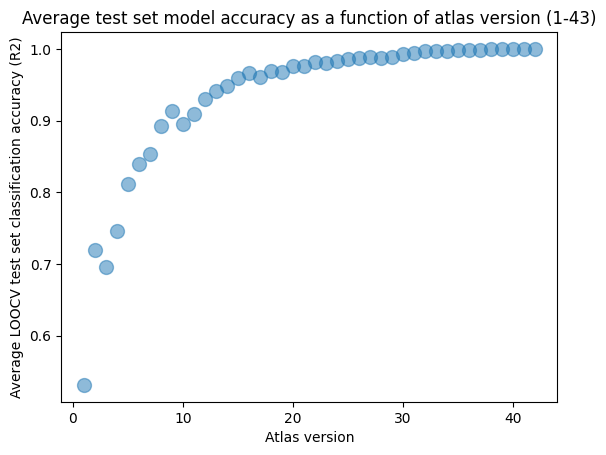

In [7]:
# mean_scores = mean(k_scores,axis=1)

# We're ready to plot
plt.style.use("default")
plt.scatter(versions,k_scores, s=100, alpha = 0.5)
plt.gca().set(
    title="Average test set model accuracy as a function of atlas version (1-43)",
    xlabel="Atlas version",
    ylabel="Average LOOCV test set classification accuracy (R2)"
)
plt.show()

When we use LOOCV instead of 5-fold cv we observe an even clearer ascending trend.